In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read and present data
df_saf = pd.read_csv('FB_SAF.csv')
df_rsf = pd.read_csv('FB_RSF.csv')

# Merge both dfs together in one df
df_merged = pd.concat([df_saf, df_rsf], axis=0)

(-1.0999998058890086,
 1.0999991559643159,
 -1.0999899260901727,
 1.0999994719660515)

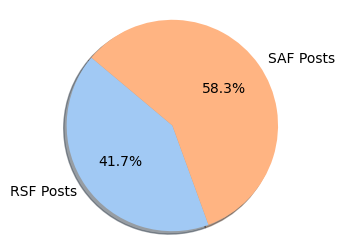

In [3]:
# Comparison between the # of tweets
plt.figure(figsize=(3,3))
colors = sns.color_palette('pastel')[0:2]
plt.pie([len(df_rsf), len(df_saf)], labels=['RSF Posts','SAF Posts'], autopct='%1.1f%%', shadow=True, startangle=140, colors = colors)
plt.axis('equal')

In [6]:
# Posts over time
df_merged['time'] = pd.to_datetime(df_merged['time'])
df_saf['time'] = pd.to_datetime(df_saf['time'])
df_rsf['time'] = pd.to_datetime(df_rsf['time'])

df_merged = df_merged.set_index(['time'])
df_saf = df_saf.set_index(['time'])
df_rsf = df_rsf.set_index(['time'])

In [7]:
def f(x): return pd.Series(dict(Number_of_Posts = x['text'].count(),))

daily_count_merged = df_merged.groupby(df_merged.index.date).apply(f)
daily_count_saf = df_saf.groupby(df_saf.index.date).apply(f)
daily_count_rsf = df_rsf.groupby(df_rsf.index.date).apply(f)
daily_count_merged.index.name, daily_count_saf.index.name, daily_count_rsf.index.name = 'date', 'date', 'date'

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

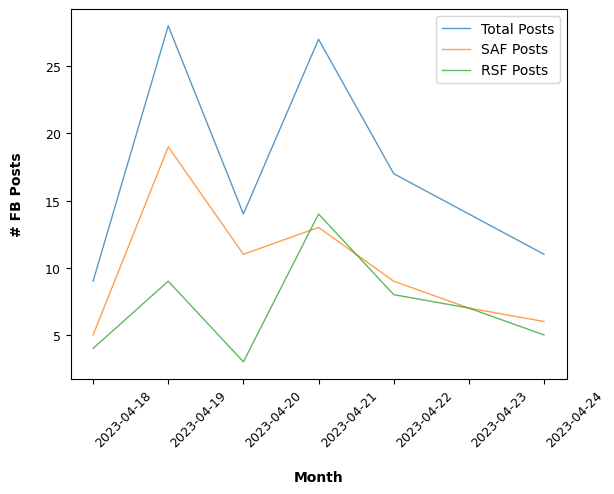

In [8]:
daily_plot_merged = daily_count_merged['Number_of_Posts'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True, label='Total Posts')
daily_plot_saf = daily_count_saf['Number_of_Posts'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True, label='SAF Posts')
daily_plot_rsf = daily_count_rsf['Number_of_Posts'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True, label='RSF Posts')

daily_plot_merged.set_xlabel('Month', weight='bold', labelpad=15) 
daily_plot_merged.set_ylabel('# FB Posts', weight='bold', labelpad=15) 

plt.xticks(fontsize = 9, rotation = 45, ha ="left") 
plt.yticks(fontsize = 9)

<Axes: xlabel='date'>

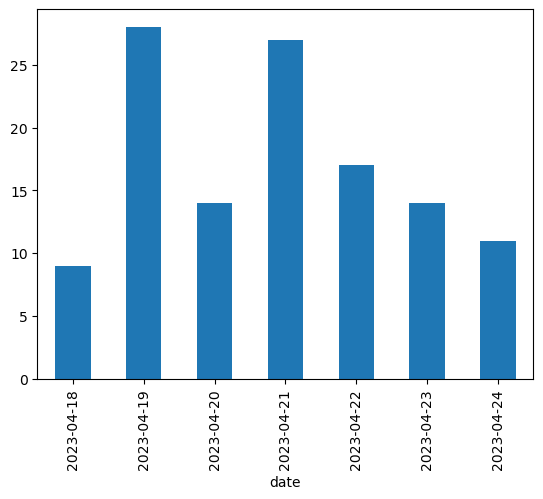

In [9]:
daily_count_merged['Number_of_Posts'].plot(kind='bar')

In [10]:
hourly_count_merged = df_merged.groupby(df_merged.index.hour).apply(f)
hourly_count_saf = df_saf.groupby(df_saf.index.hour).apply(f)
hourly_count_rsf = df_rsf.groupby(df_rsf.index.hour).apply(f)
hourly_count_merged.index.name, hourly_count_saf.index.name, hourly_count_rsf.index.name = 'hour', 'hour', 'hour'

# Adjusting time to represent the actual hours from (1 to 24)
hourly_count_merged.index = hourly_count_merged.index + 1
hourly_count_saf.index = hourly_count_saf.index + 1
hourly_count_rsf.index = hourly_count_rsf.index + 1

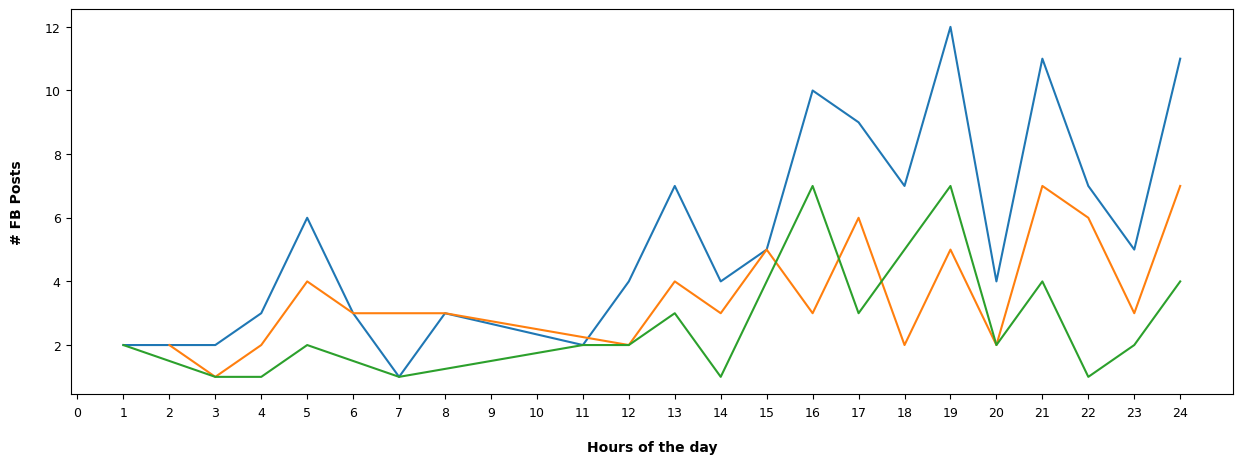

In [11]:
plt.figure(figsize=(15,5))
hourly_plot_merged = hourly_count_merged['Number_of_Posts'].plot(kind='line')
hourly_plot_saf = hourly_count_saf['Number_of_Posts'].plot(kind='line')
hourly_plot_rsf = hourly_count_rsf['Number_of_Posts'].plot(kind='line')

# hours = list(range(0,25))

hourly_plot_merged.set_xlabel('Hours of the day', weight='bold', labelpad=15) 
hourly_plot_merged.set_ylabel('# FB Posts', weight='bold', labelpad=15) 

plt.xticks(np.arange(25), rotation = 0, fontsize=9,ha="center") 
plt.yticks(fontsize = 9)

hourly_plot_merged.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

hourly_plot_merged.legend_ = None                                                 #TURN OFF LEGEND


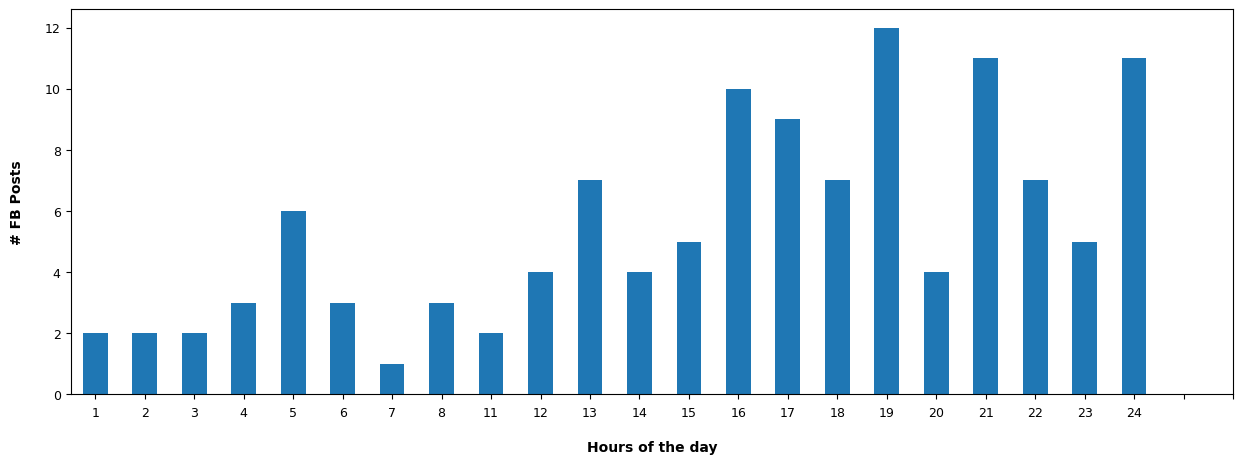

In [12]:
plt.figure(figsize=(15,5))

hourly_plot_merged = hourly_count_merged['Number_of_Posts'].plot(kind='bar')

hourly_plot_merged.set_xlabel('Hours of the day', weight='bold', labelpad=15) 
hourly_plot_merged.set_ylabel('# FB Posts', weight='bold', labelpad=15) 

plt.xticks(np.arange(24), rotation = 0, fontsize=9,ha="center") 
plt.yticks(fontsize = 9)

hourly_plot_merged.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

hourly_plot_merged.legend_ = None                                                 #TURN OFF LEGEND


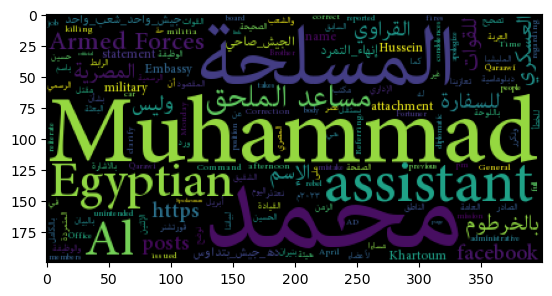

In [14]:
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

f = df_merged['text'][0]

# Make text readable for a non-Arabic library like wordcloud
text = arabic_reshaper.reshape(f)
text = get_display(text)

# Generate a word cloud image
wordcloud = WordCloud(font_path='Adobe Arabic Regular.ttf').generate(text)
plt.imshow(wordcloud)